In [1]:
# Importing the essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the datasets from the .csv file using pandas
data = pd.read_csv('Test 1.csv')

In [3]:
# Explore the datasets.
print(data.columns)

Index(['customer_id', 'demographic_slice', 'country_reg', 'ad_exp',
       'est_income', 'hold_bal', 'pref_cust_prob', 'imp_cscore', 'RiskScore',
       'imp_crediteval', 'axio_score', 'card_offer'],
      dtype='object')


In [4]:
# check the shape of data.
print(data.shape)

(10000, 12)


In [5]:
# Summary of data
print(data.describe())

         customer_id     est_income      hold_bal  pref_cust_prob  \
count   10000.000000   10000.000000  10000.000000    10000.000000   
mean   496819.831400   65853.355259     20.962621        0.329419   
std    287391.314157   31093.369592     18.841121        0.223299   
min       244.000000       2.054543     -2.140206        0.001781   
25%    245172.500000   39165.786086      6.150577        0.156965   
50%    495734.000000   76903.628763     11.913366        0.272263   
75%    745475.250000   91032.514900     32.238914        0.459890   
max    999870.000000  150538.809704     81.759632        1.144357   

         imp_cscore     RiskScore  imp_crediteval    axio_score  
count  10000.000000  10000.000000    10000.000000  10000.000000  
mean     662.548800    670.042869       25.692162      0.393211  
std       90.549985     89.965854        1.889274      0.288243  
min      500.000000    324.436647       21.363123     -0.000052  
25%      600.000000    609.231181       24.29543

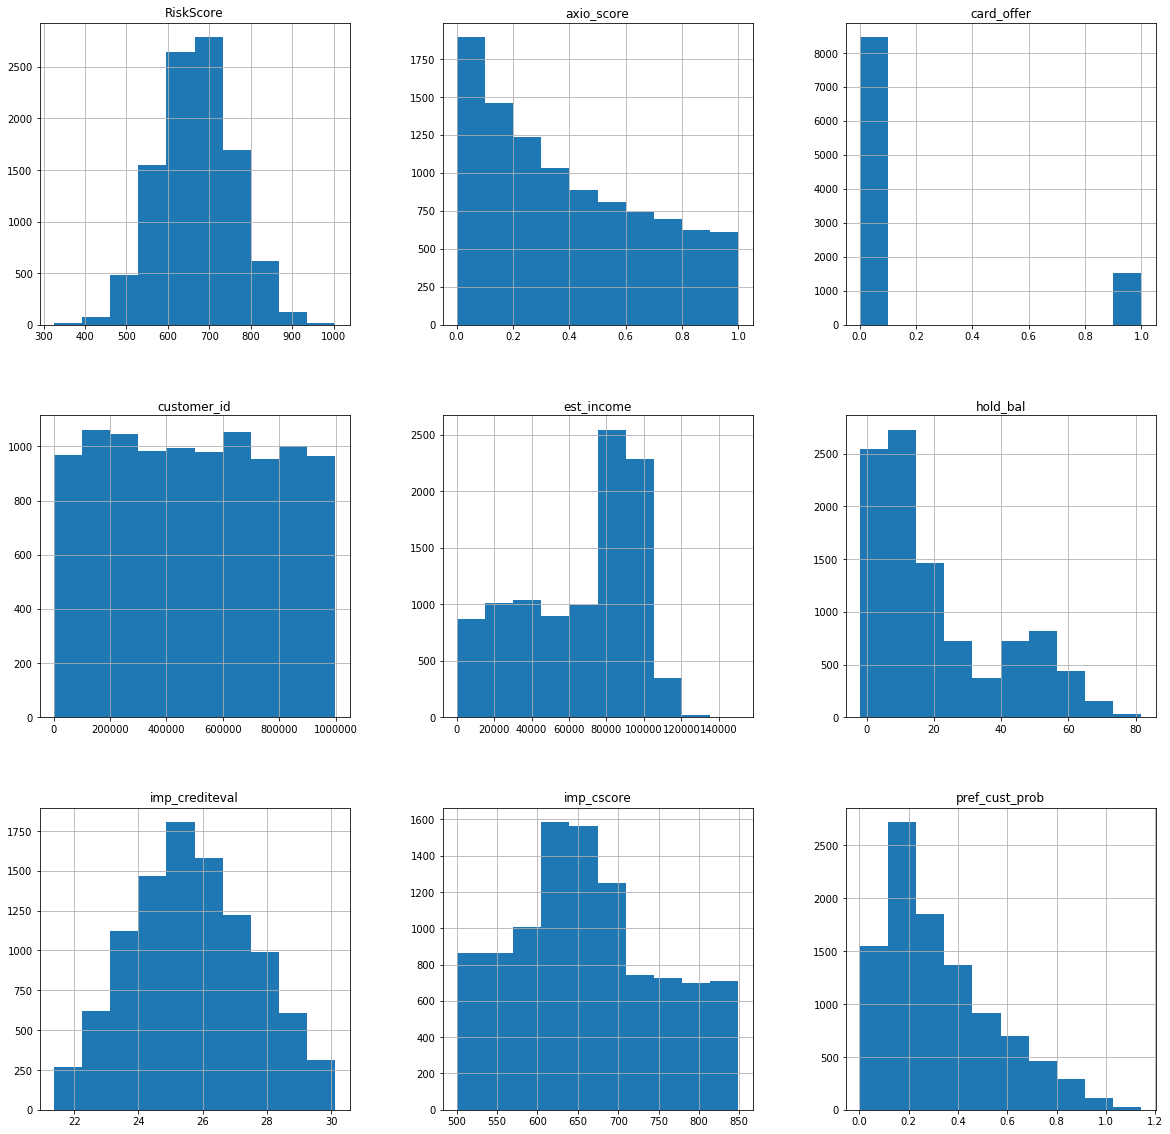

In [6]:
# plot a histogram of each parameter
data.hist(figsize=(20,20))
plt.show()

In [7]:
# Determine the number of No_card_subcription in the datasets
card_sub_Yes = data[data['card_offer'] == True]
card_sub_No = data[data['card_offer'] == False]

outlier_fraction = len(card_sub_No)/ float(len(card_sub_Yes))
print(outlier_fraction)

print('Card_subscription_yes: {}'.format(len(card_sub_Yes)))
print('Card_subscription_No: {}'.format(len(card_sub_No)))

5.531678641410843
Card_subscription_yes: 1531
Card_subscription_No: 8469


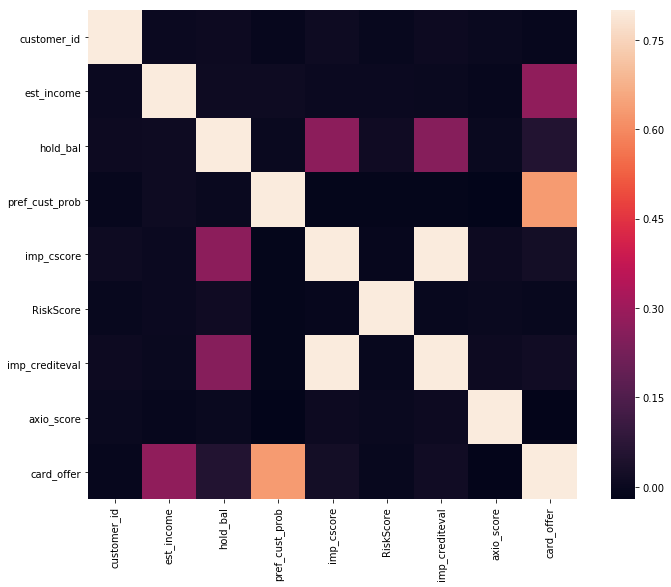

In [8]:
# correlation matrix
corealtion_metrics = data.corr()
fig = plt.figure(figsize= (12,9))

sns.heatmap(corealtion_metrics,vmax= .8, square= True)
plt.show()

In [9]:
# Since our datasets has numerical and categorical values,we need to convert the categorical value to numerical one using pandas
data = pd.get_dummies(data)
data.head()

,customer_id,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer,demographic_slice_AX03efs,demographic_slice_BWEsk45,demographic_slice_CARDIF2,demographic_slice_DERS3w5,country_reg_E,country_reg_W,ad_exp_N,ad_exp_Y
0,713782,33407.901749,3.000000,0.531112,619,503.249027,23.977827,0.137289,False,1,0,0,0,0,1,1,0
1,515901,19927.533533,20.257927,0.297439,527,820.108146,22.986398,0.052264,False,1,0,0,0,1,0,1,0
2,95166,51222.470997,4.000000,0.018463,606,586.605795,24.939219,0.452035,False,1,0,0,0,0,1,0,1
3,425557,67211.587467,18.653631,0.089344,585,634.701982,24.841147,0.564619,False,1,0,0,0,1,0,0,1
4,624581,20093.342158,4.000000,0.094948,567,631.949979,24.679363,0.917304,False,1,0,0,0,0,1,1,0


In [10]:
# Get all the coloumns from the datasets.
coloumns = data.columns.tolist()

# filter the coloumns to remove data we do not want
coloumns = [c for c in coloumns if c not in ["customer_id", "card_offer"]]

# store the variable we need to predict
target = "card_offer"

X = data[coloumns]
Y = data[target]

# print the shapes of X and Y
print(X.shape)
print(Y.shape)

(10000, 15)
(10000,)


In [11]:
# Divide the datasets into traning and testing datsets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 0)


In [12]:
#  Balancing the data using SMOTE technique
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, Y_train = smt.fit_sample(X_train, Y_train)
np.bincount(Y_train)

array([6352, 6352], dtype=int64)

In [13]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

C:\Users\sontaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sontaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
# Traning the Algorithm
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, Y_train)  
y_pred = regressor.predict(X_test) 

In [15]:
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(Y_test,y_pred.round()))  
print(classification_report(Y_test,y_pred.round()))  
print(accuracy_score(Y_test, y_pred.round()))

[[1541  576]
 [   0  383]]
              precision    recall  f1-score   support

       False       1.00      0.73      0.84      2117
        True       0.40      1.00      0.57       383

   micro avg       0.77      0.77      0.77      2500
   macro avg       0.70      0.86      0.71      2500
weighted avg       0.91      0.77      0.80      2500

0.7696
